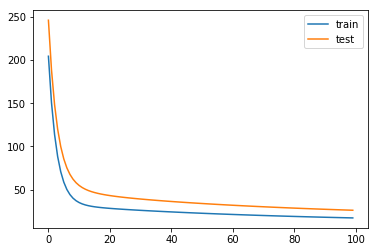

In [1]:
# -*- coding: utf-8 -*-

# Required Packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

X,y = load_svmlight_file("housing_scale.txt")
toappend = np.ones([X.shape[0],1])
X = X.toarray()
X = np.hstack((X,toappend))
y = y.reshape((y.shape[0],1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

n = X_train.shape[0]
m = X_train.shape[1]

def loss_func(X,y,W):
    n_ = y.shape[0]
    X = X.reshape((n_,m))
    y = y.reshape((n_,1))
    W = W.reshape((m,1))
    M = y - X.dot(W)
    loss_ = (M.T.dot(M)/2/n_)[0][0]
    return loss_

def gradient(X,y,W):
    X = X.reshape((n,m))
    y = y.reshape((n,1))
    W = W.reshape((m,1))
    return (-X.T.dot(y)+X.T.dot(X).dot(W))

W = np.zeros([m,1])

learn_rate = 0.0001
loss_train = []
loss_test = []
for i in range(100):
    G = gradient(X_train,y_train,W)
    W = W-learn_rate*G
    loss_train.append(loss_func(X_train,y_train,W))
    loss_test.append(loss_func(X_test,y_test,W))

plt.plot(loss_train,label = 'train')
plt.plot(loss_test, label = 'test' )
plt.legend(loc='upper right')
plt.show()
